# 6.2 주요 레이어 정리

In [6]:
import tensorflow as tf

In [7]:
conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3),strides=(2,2),padding='valid' ,filters=16)

In [8]:
pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))

# 6.3 Fashion MNIST 데이터세트에 적용하기

In [14]:
# 6.4 Fashion MNIST 데이터셋 불러오기 및 정규화
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

In [15]:
print("- reshape 이전")
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

print("\n- reshpae 이후")
print(train_X.shape, test_X.shape)

- reshape 이전
(60000, 28, 28) (10000, 28, 28)

- reshpae 이후
(60000, 28, 28, 1) (10000, 28, 28, 1)


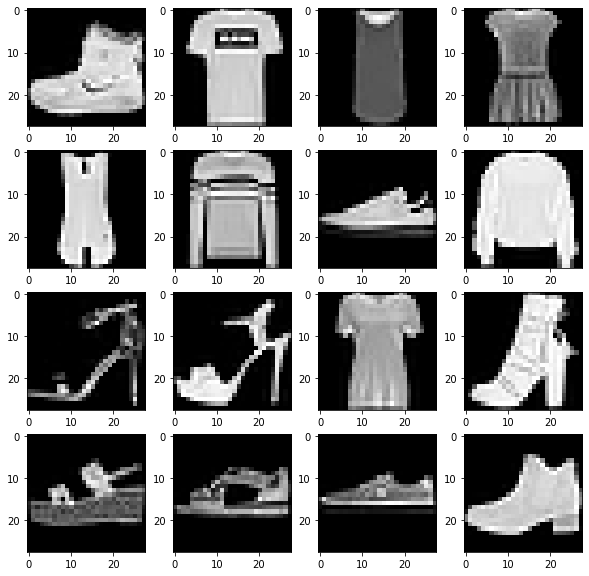

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for c in range(16):
    plt.subplot(4,4,c+1)
    plt.imshow(train_X[c].reshape(28,28), cmap='gray')
    
plt.show()

print(train_Y[:16])

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

In [18]:
tf.random.set_seed(126)

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

Epoch 1/25
1407/1407 [==============================] - 84s 58ms/step - loss: 0.4659 - accuracy: 0.8347 - val_loss: 0.4166 - val_accuracy: 0.8481
Epoch 2/25
1407/1407 [==============================] - 82s 58ms/step - loss: 0.3357 - accuracy: 0.8790 - val_loss: 0.3602 - val_accuracy: 0.8709
Epoch 3/25
1407/1407 [==============================] - 88s 62ms/step - loss: 0.2829 - accuracy: 0.8961 - val_loss: 0.3907 - val_accuracy: 0.8693
Epoch 4/25
 201/1407 [===>..........................] - ETA: 1:08 - loss: 0.2296 - accuracy: 0.9150 ETA: 1:08 - loss: 0.2298 - accura

KeyboardInterrupt: 

In [ ]:
ㅌ